In [1]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [2]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
rivers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

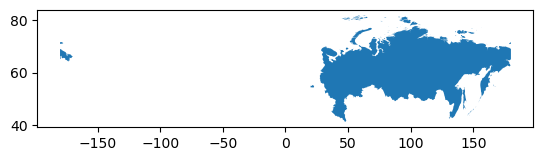

In [5]:
rusia=countries[countries.COUNTRY=='Russia']

rusia.plot()


<Axes: >

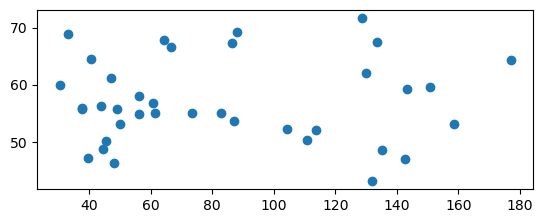

In [6]:
ciudades_rusia=cities[cities.COUNTRY=='Russia']

ciudades_rusia.plot()

<Axes: >

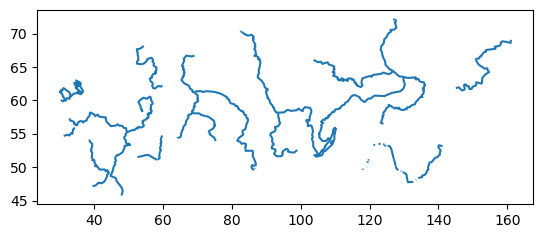

In [7]:
rios_rusia=gpd.clip(gdf=rivers, mask=rusia)

rios_rusia.plot()

In [8]:
rusia_coordenada=[55.75222, 37.61556]

In [28]:
argentina.to_crs(5940).crs.axis_info

[Axis(name=Northing, abbrev=X, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=Y, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

<Axes: >

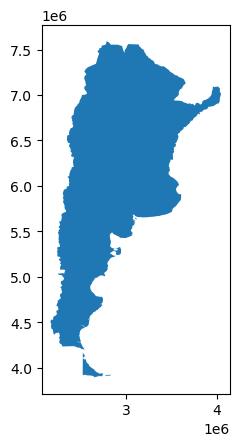

In [29]:
argentina.to_crs(5940).plot()

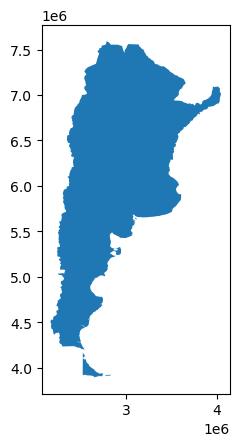

In [33]:
mapabase4839=argentina.to_crs(9252).plot()

#alemania.to_crs(4839).centroid.plot(color='pink',ax=mapabase4839)

<Axes: >

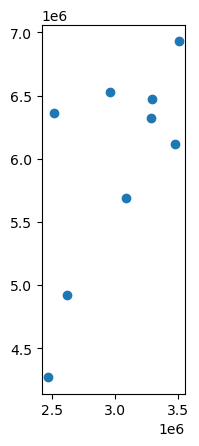

In [37]:
argentina9252=argentina.to_crs(9252)
ciudades_argentina=cities[cities.COUNTRY=='Argentina']
ciudades9252=ciudades_argentina.to_crs(argentina9252.crs)#que estas ciudaes se representen dentro del mapa como coordenadas

ciudades9252.plot()

In [41]:
rios9252=rivers.to_crs(argentina9252.crs)
rios9252=gpd.clip(gdf=rios9252, mask=argentina9252)

rios9252.plot()

GEOSException: IllegalArgumentException: CGAlgorithmsDD::orientationIndex encountered NaN/Inf numbers

<Axes: >

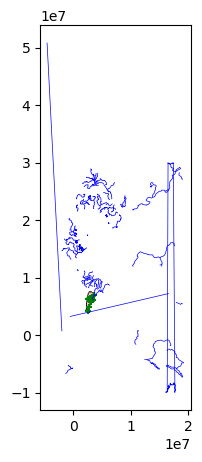

In [40]:
mapabase=argentina9252.plot(facecolor='pink',edgecolor='black',linewidth=0.5,figsize=(5,5))
ciudades9252.plot(marker='+',color='green', markersize=16,ax=mapabase)
rios9252.plot(edgecolor='blue',linewidth=0.5,ax=mapabase)

In [16]:
alemania_coordenada=[52.52437, 13.41053]

In [17]:
import folium
m=ciudades4839.explore(location=alemania_coordenada,zoom_start=5,tiles='cartoDB positron',color='pink', name="cities")

m=rios4839.explore(m=m,color='blue',name="rivers")

folium.LayerControl().add_to(m)

m

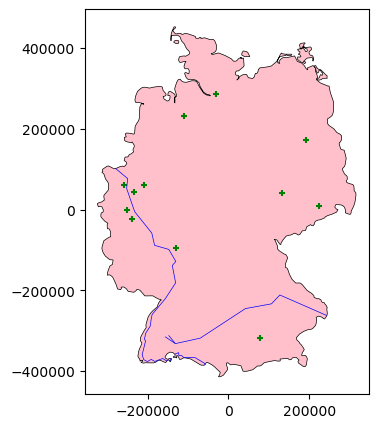

In [18]:
import matplotlib.pyplot as plt

mapabase=alemania4839.plot(facecolor='pink',edgecolor='black',linewidth=0.5,figsize=(5,5))
mapa2=ciudades4839.plot(marker='+',color='green', markersize=16,ax=mapabase)
mapa3=rios4839.plot(edgecolor='blue',linewidth=0.5,ax=mapabase)

plt.savefig(os.path.join("figures",'mapa3.jpg'))

In [19]:
countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")

In [20]:
worldMaps='https://github.com/Romina300/simpleplot/raw/main/maps/worldMaps.gpkg'

In [30]:
from  fiona import listlayers

listlayers(worldMaps)

['countries', 'cities', 'rivers']

In [27]:
countries=gpd.read_file(worldMaps,layer='countries')
cities=gpd.read_file(worldMaps,layer='cities')
rivers=gpd.read_file(worldMaps,layer='rivers')

In [28]:
import os

alemania4839.to_file(os.path.join("maps","alemania4839","alemaniaMaps4839.gpkg"), layer='country', driver="GPKG")
ciudades4839.to_file(os.path.join("maps","alemania4839","alemaniaMaps4839.gpkg"), layer='cities', driver="GPKG")
rios4839.to_file(os.path.join("maps","alemania4839","alemaniaMaps4839.gpkg"), layer='rivers', driver="GPKG")


In [29]:
link_alemaniaMaps4839='https://github.com/Romina300/simpleplot/raw/main/maps/alemania4839/alemaniaMaps4839.gpkg'

In [25]:
from  fiona import listlayers

listlayers(link_alemaniaMaps4839)

['country', 'cities', 'rivers']

In [ ]:
#countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
#cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")
#rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")